In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# DataViz
import seaborn as sns 
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv("cancer.csv", encoding='latin1')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,41.1,48.8,"Ellsworth County, Kansas",2.08,51.0,20.9,27.9,NaN,8.4,32.2,15.2,51.7,4.3,78.3,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,29.3,31.4,"Finney County, Kansas",2.90,52.6,26.7,33.9,35.6,3.8,23.1,12.4,70.1,4.6,64.5,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,30.5,31.2,"Ford County, Kansas",3.04,54.8,19.7,44.5,33.3,2.5,23.0,12.8,64.8,6.4,62.0,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,36.9,40.5,"Franklin County, Kansas",2.56,58.8,10.9,37.2,NaN,4.1,36.1,14.4,NaN,6.9,75.9,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [5]:
#Preprocess
#Remove the null-vals
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [6]:
df["PctSomeCol18_24"].fillna(df["PctSomeCol18_24"].mean(), inplace=True)

In [7]:
df["PctPrivateCoverageAlone"].fillna(df["PctPrivateCoverageAlone"].mean(), inplace=True)
df["PctEmployed16_Over"].fillna(df["PctEmployed16_Over"].mean(), inplace=True)

In [8]:
df.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [9]:
#Remove the non-numeric features (#binnedinc, #geography)
from sklearn.preprocessing import LabelEncoder

In [10]:
class_labels=LabelEncoder()

In [233]:
class_labels.fit_transform(df["binnedInc"].values)

array([8, 5, 5, ..., 6, 5, 2], dtype=int64)

In [12]:
df["binnedInc"]=class_labels.fit_transform(df["binnedInc"].values)

In [13]:
df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,8,39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.100000,6.9,23.2,19.6,51.900000,8.0,75.1,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,5,33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.000000,7.5,26.0,22.7,55.900000,7.8,70.2,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,5,45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,40.977034,9.5,29.0,16.0,45.900000,7.0,63.7,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,3,42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.100000,2.5,31.6,9.3,48.300000,12.1,58.4,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,5,48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.000000,2.0,33.4,15.0,48.200000,4.8,61.6,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,4,44.2,41.1,48.8,"Ellsworth County, Kansas",2.08,51.0,20.9,27.9,40.977034,8.4,32.2,15.2,51.700000,4.3,78.3,54.900000,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,5,30.4,29.3,31.4,"Finney County, Kansas",2.90,52.6,26.7,33.9,35.600000,3.8,23.1,12.4,70.100000,4.6,64.5,53.300000,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,6,30.9,30.5,31.2,"Ford County, Kansas",3.04,54.8,19.7,44.5,33.300000,2.5,23.0,12.8,64.800000,6.4,62.0,52.600000,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,5,39.0,36.9,40.5,"Franklin County, Kansas",2.56,58.8,10.9,37.2,40.977034,4.1,36.1,14.4,54.152642,6.9,75.9,56.300000,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [14]:
df['Geography']=class_labels.fit_transform(df["Geography"].values)

In [15]:
df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,8,39.3,36.9,41.7,1458,2.54,52.5,11.5,39.5,42.100000,6.9,23.2,19.6,51.900000,8.0,75.1,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,5,33.0,32.2,33.7,1459,2.34,44.5,6.1,22.4,64.000000,7.5,26.0,22.7,55.900000,7.8,70.2,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,5,45.0,44.0,45.8,1463,2.62,54.2,24.0,36.6,40.977034,9.5,29.0,16.0,45.900000,7.0,63.7,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,3,42.8,42.2,43.4,1587,2.52,52.7,20.2,41.2,36.100000,2.5,31.6,9.3,48.300000,12.1,58.4,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,5,48.3,47.8,48.9,1617,2.34,57.8,14.9,43.0,40.000000,2.0,33.4,15.0,48.200000,4.8,61.6,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,4,44.2,41.1,48.8,838,2.08,51.0,20.9,27.9,40.977034,8.4,32.2,15.2,51.700000,4.3,78.3,54.900000,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,5,30.4,29.3,31.4,892,2.90,52.6,26.7,33.9,35.600000,3.8,23.1,12.4,70.100000,4.6,64.5,53.300000,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,6,30.9,30.5,31.2,907,3.04,54.8,19.7,44.5,33.300000,2.5,23.0,12.8,64.800000,6.4,62.0,52.600000,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,5,39.0,36.9,40.5,924,2.56,58.8,10.9,37.2,40.977034,4.1,36.1,14.4,54.152642,6.9,75.9,56.300000,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [16]:
#Describe the dataset

#I.Number of samples
print("Number of samples:", df.shape[0])
#II. Number of features
print("Number of features:", df.shape[1])


Number of samples: 3047
Number of features: 34


In [17]:
# III. Mean and Variance for each feature
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,4.502133,45.272333,39.570725,42.145323,1523.000000,2.479662,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,2.871380,45.304480,5.226017,5.292849,879.737461,0.429174,6.896928,8.093064,9.069722,5.556077,4.529059,7.034924,5.394756,8.104942,3.452371,10.647057,9.018885,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,0.000000,22.300000,22.400000,22.300000,0.000000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,2.000000,37.700000,36.350000,39.100000,761.500000,2.370000,47.750000,12.800000,29.200000,40.977034,3.100000,30.400000,9.400000,48.900000,5.500000,57.200000,43.100000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,5.000000,41.000000,39.600000,42.400000,1523.000000,2.500000,52.400000,17.100000,34.700000,40.977034,5.400000,35.300000,12.300000,54.152642,7.600000,65.100000,48.453774,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,7.000000,44.000000,42.500000,45.300000,2284.500000,2.630000,56.400000,22.700000,40.700000,40.977034,8.200000,39.650000,16.100000,60.000000,9.700000,72.100000,53.800000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,9.000000,624.000000,64.700000,65.700000,3046.000000,3.970000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [18]:
print("Mean of each feature:\n", df.mean())

Mean of each feature:
 avgAnnCount                   606.338544
avgDeathsPerYear              185.965868
TARGET_deathRate              178.664063
incidenceRate                 448.268586
medIncome                   47063.281917
popEst2015                 102637.370528
povertyPercent                 16.878175
studyPerCap                   155.399415
binnedInc                       4.502133
MedianAge                      45.272333
MedianAgeMale                  39.570725
MedianAgeFemale                42.145323
Geography                    1523.000000
AvgHouseholdSize                2.479662
PercentMarried                 51.773679
PctNoHS18_24                   18.224450
PctHS18_24                     35.002068
PctSomeCol18_24                40.977034
PctBachDeg18_24                 6.158287
PctHS25_Over                   34.804660
PctBachDeg25_Over              13.282015
PctEmployed16_Over             54.152642
PctUnemployed16_Over            7.852412
PctPrivateCoverage             64.

In [242]:
print("Variance of each feature:\n", df.var().astype(int))

Variance of each feature:
 avgAnnCount                   2006064
avgDeathsPerYear               254151
TARGET_deathRate                  770
incidenceRate                    2976
medIncome                   144963787
popEst2015                -2147483648
povertyPercent                     41
studyPerCap                    280506
binnedInc                           8
MedianAge                        2052
MedianAgeMale                      27
MedianAgeFemale                    28
Geography                      773937
AvgHouseholdSize                    0
PercentMarried                     47
PctNoHS18_24                       65
PctHS18_24                         82
PctSomeCol18_24                    30
PctBachDeg18_24                    20
PctHS25_Over                       49
PctBachDeg25_Over                  29
PctEmployed16_Over                 65
PctUnemployed16_Over               11
PctPrivateCoverage                113
PctPrivateCoverageAlone            81
PctEmpPrivCoverage     

In [20]:
#IV. Correlation matrix. 

In [21]:
df_corr=df.corr(method="pearson")
df_corr

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,0.136877,-0.024098,-0.124969,-0.122844,0.025738,0.064788,-0.106108,-0.143327,-0.182054,0.070159,0.284176,-0.311375,0.321021,0.197981,-0.009016,0.132244,0.166674,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,0.113331,-0.024599,-0.148487,-0.144069,0.016971,0.086161,-0.181029,-0.136794,-0.151418,0.063322,0.259761,-0.295929,0.293210,0.125015,0.069701,0.056183,0.112221,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,-0.141535,0.004375,-0.021929,0.012048,0.011783,-0.036905,-0.266820,0.088463,0.261976,-0.094765,-0.287817,0.404589,-0.485477,-0.397487,0.378412,-0.386066,-0.326067,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.004032,0.018089,-0.014733,-0.009106,0.036172,-0.118400,-0.119524,-0.170762,0.022644,0.038442,0.046835,0.121725,-0.038177,0.004622,0.099979,0.105174,0.098846,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,0.440047,-0.013288,-0.091663,-0.153278,0.022317,0.112065,0.355123,-0.289383,-0.190006,0.101864,0.492810,-0.471348,0.704928,0.676307,-0.453108,0.724175,0.706956,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,0.126305,-0.025219,-0.176608,-0.177932,0.014836,0.109940,-0.160463,-0.126582,-0.151821,0.065207,0.248375,-0.311849,0.297463,0.139571,0.050768,0.052677,0.121365,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.202860,-0.029280,-0.214001,-0.148164,-0.005976,0.074308,-0.642857,0.288106,0.094211,-0.079355,-0.387122,0.194361,-0.531600,-0.719972,0.655148,-0.822534,-0.682760,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,0.036630,-0.026030,-0.036647,-0.030577,-0.010653,-0.004071,-0.038143,-0.090387,-0.057035,0.032604,0.063819,-0.085128,0.108594,0.087669,-0.031957,0.092545,0.068599,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
binnedInc,0.136877,0.113331,-0.141535,0.004032,0.440047,0.126305,-0.202860,0.036630,1.000000,-0.022113,-0.107977,-0.124134,0.020464,0.097754,0.043521,-0.093126,-0.082350,0.039836,0.205190,-0.256878,0.317186,0.259799,-0.087914,0.242736,0.286038,0.312509,-0.295526,-0.221318,-0.091390,0.066449,0.200364,0.069296,0.092693,0.013206
MedianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,-0.022113,1.000000,0.129119,0.124678,0.000292,-0.031944,0.046372,0.006178,0.050574,-0.009180,-0.016909,0.036587,-0.020352,-0.023598,0.018590,0.004665,-0.021466,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276


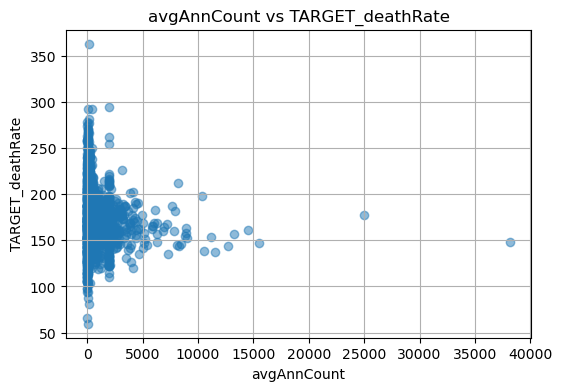

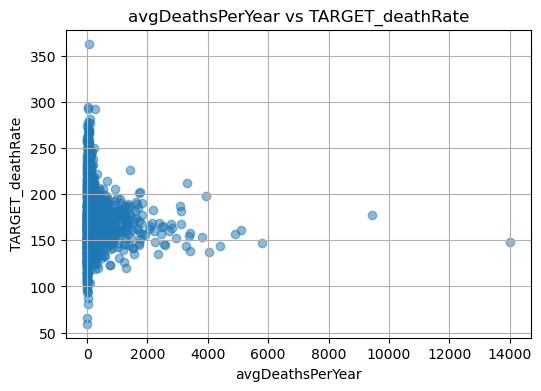

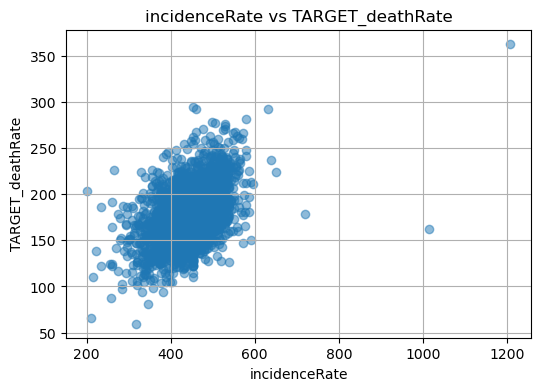

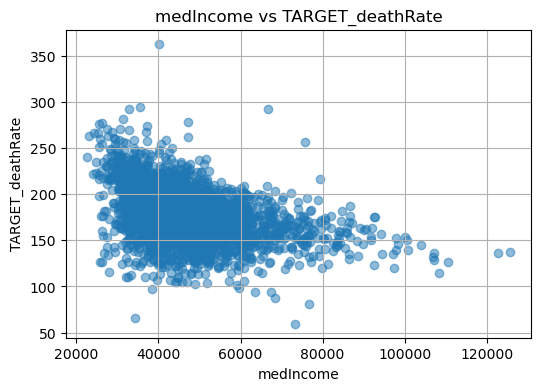

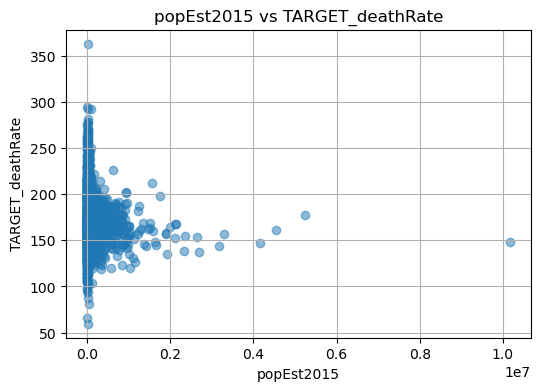

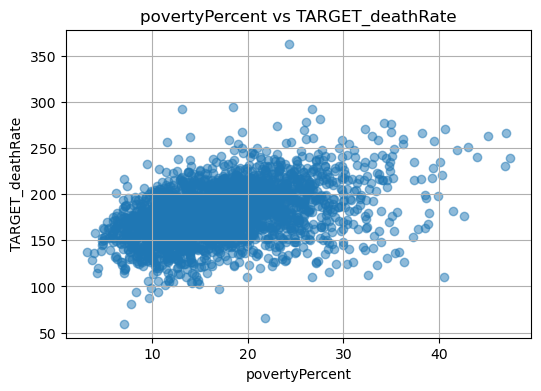

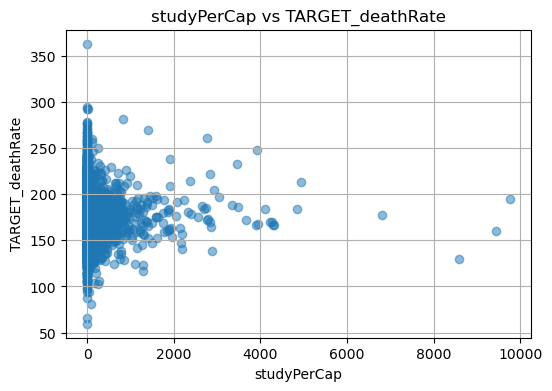

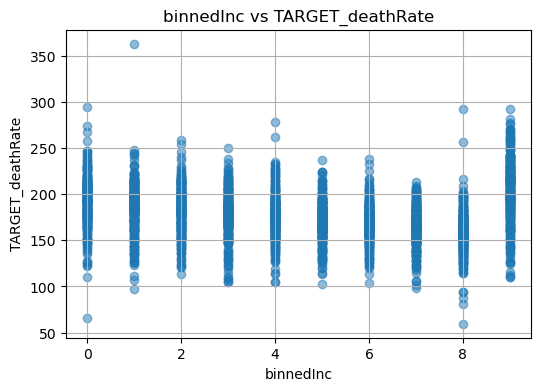

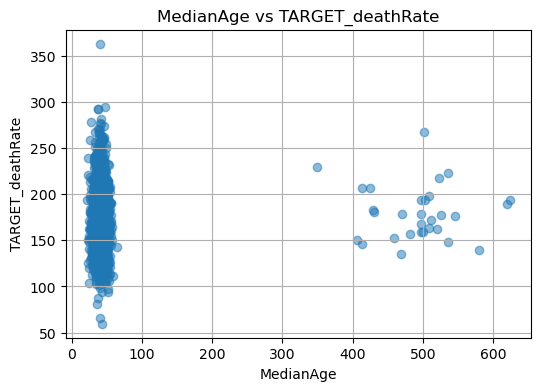

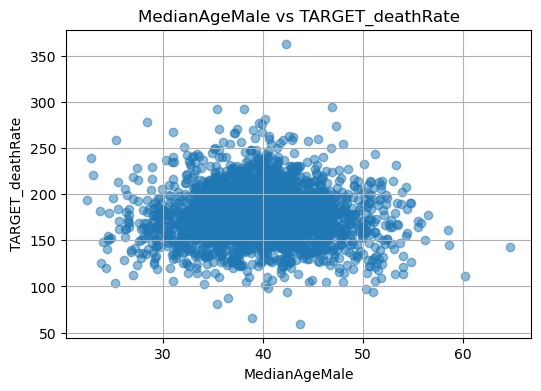

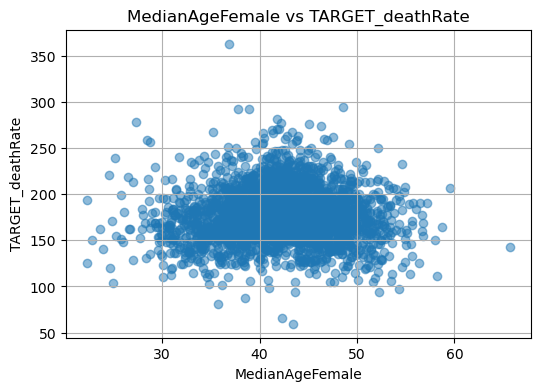

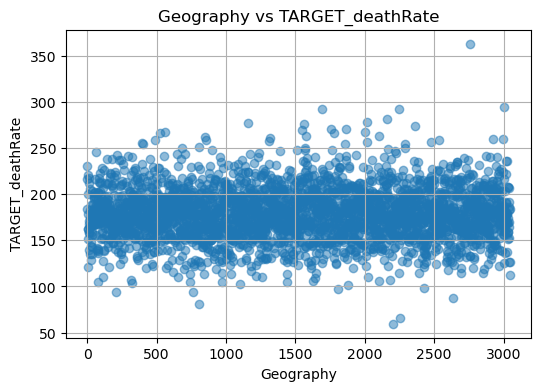

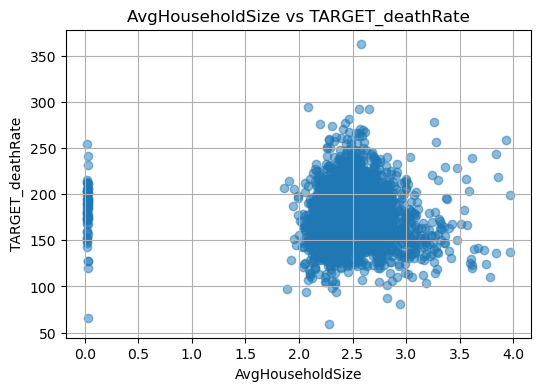

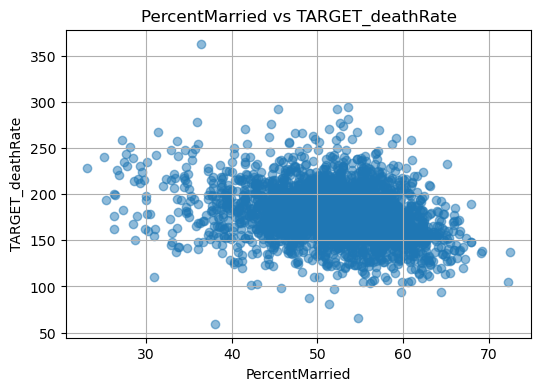

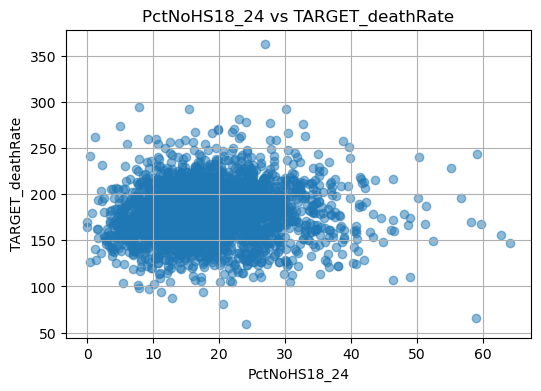

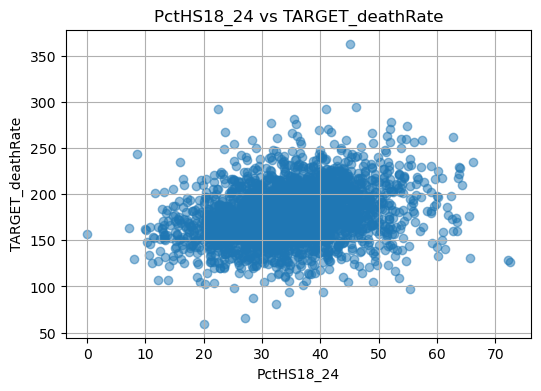

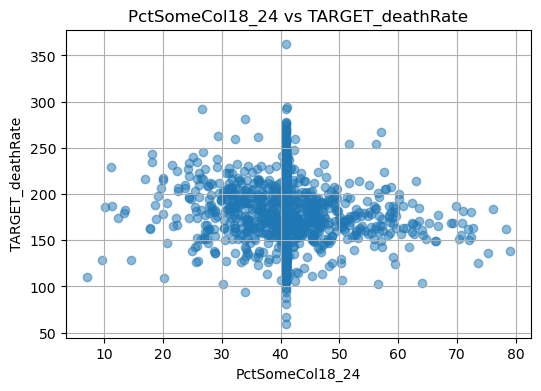

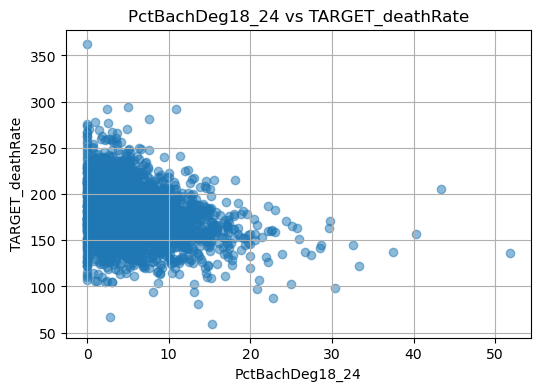

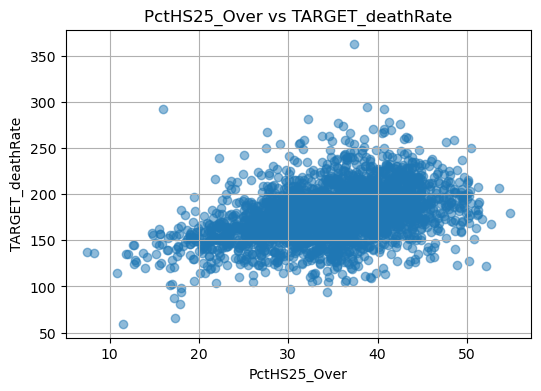

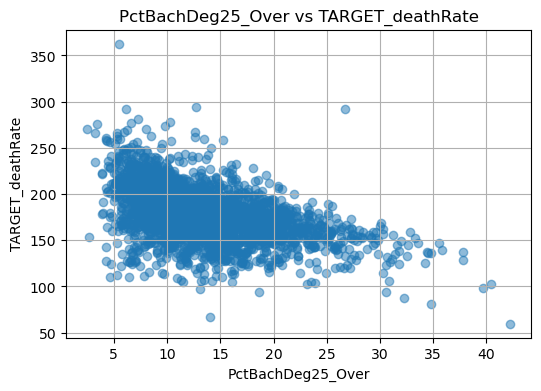

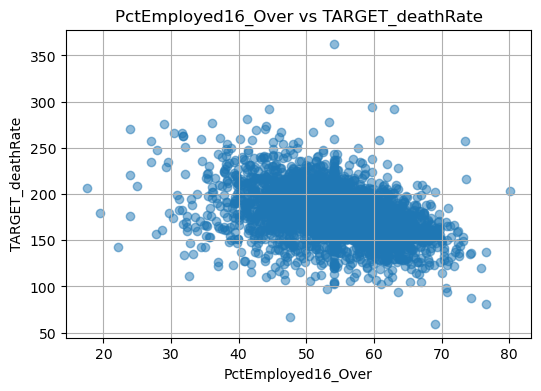

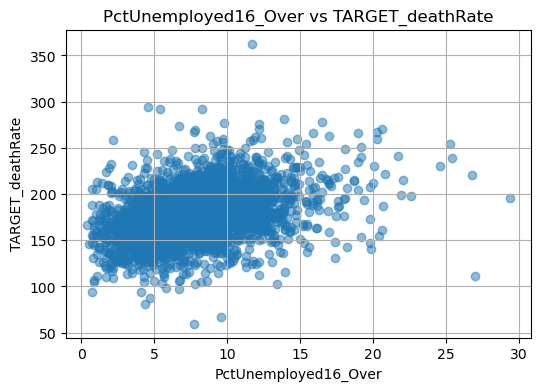

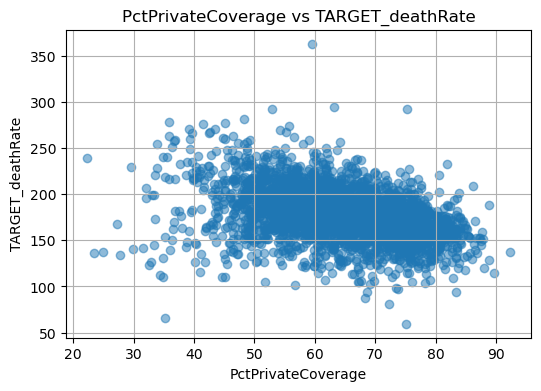

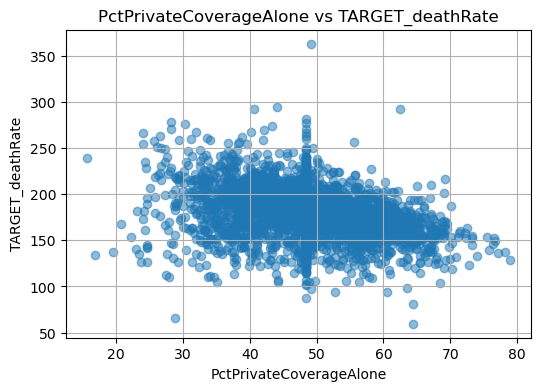

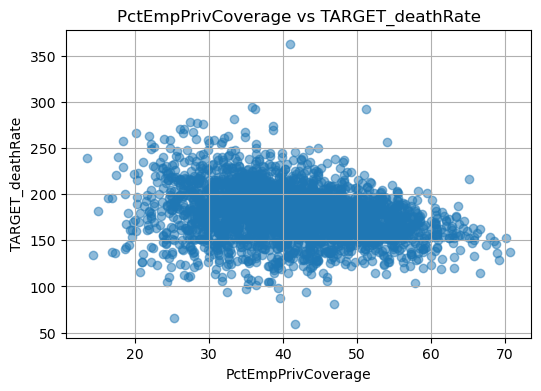

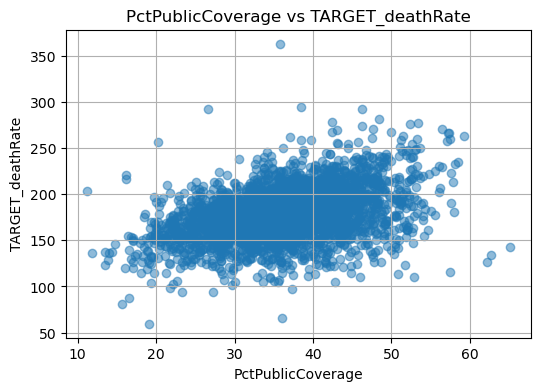

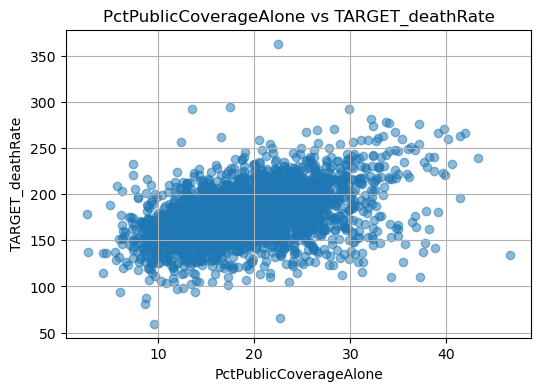

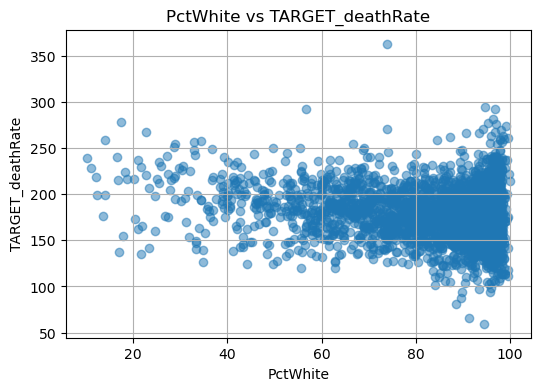

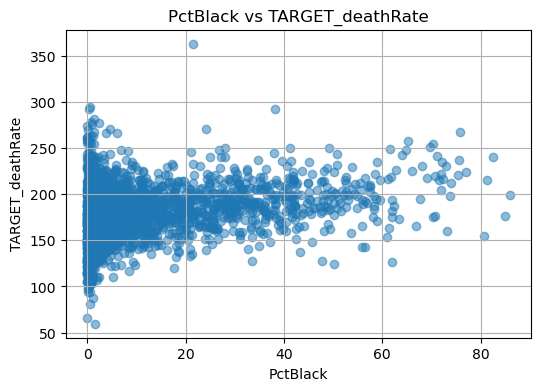

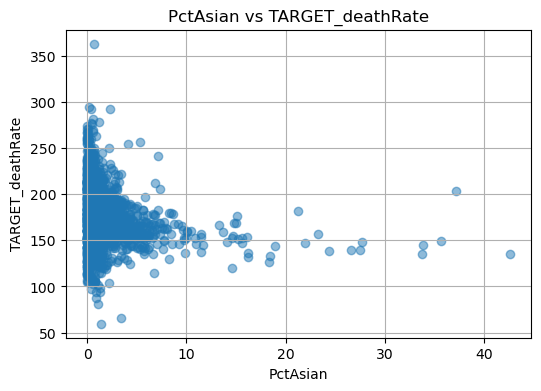

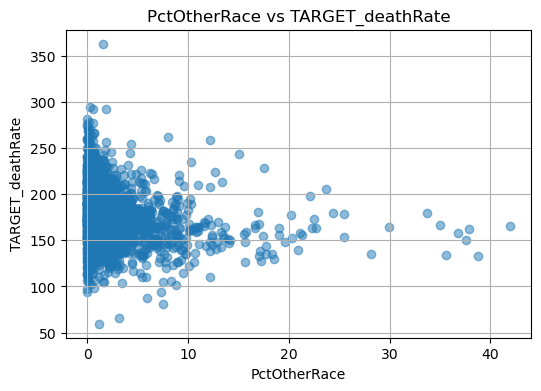

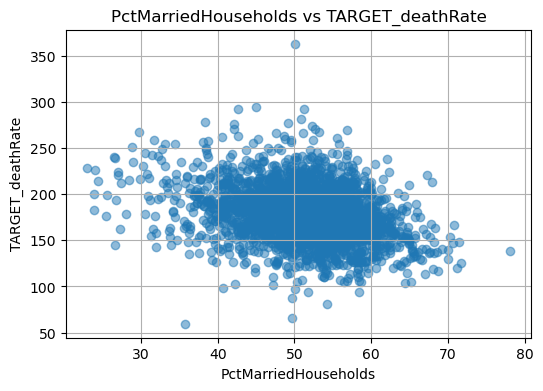

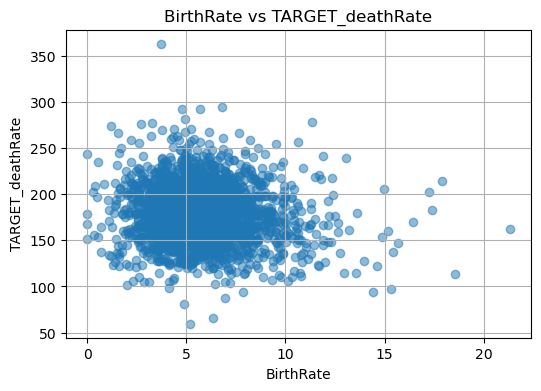

In [22]:
#Visualize your data and add your figures in the report: Create scatter diagrams to visualize the
#relationship between the death rate (the target) and other features separately
features = df.columns[df.columns != 'TARGET_deathRate']
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df['TARGET_deathRate'], alpha=0.5)
    plt.title(f'{feature} vs TARGET_deathRate')
    plt.xlabel(feature)
    plt.ylabel('TARGET_deathRate')
    plt.grid(True)
    plt.show()

In [23]:
df_corr[(df_corr["TARGET_deathRate"]<=-0.42)|(df_corr["TARGET_deathRate"]>0.42)]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,-0.141535,0.004375,-0.021929,0.012048,0.011783,-0.036905,-0.266820,0.088463,0.261976,-0.094765,-0.287817,0.404589,-0.485477,-0.397487,0.378412,-0.386066,-0.326067,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.004032,0.018089,-0.014733,-0.009106,0.036172,-0.118400,-0.119524,-0.170762,0.022644,0.038442,0.046835,0.121725,-0.038177,0.004622,0.099979,0.105174,0.098846,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,0.440047,-0.013288,-0.091663,-0.153278,0.022317,0.112065,0.355123,-0.289383,-0.190006,0.101864,0.492810,-0.471348,0.704928,0.676307,-0.453108,0.724175,0.706956,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.202860,-0.029280,-0.214001,-0.148164,-0.005976,0.074308,-0.642857,0.288106,0.094211,-0.079355,-0.387122,0.194361,-0.531600,-0.719972,0.655148,-0.822534,-0.682760,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
PctBachDeg25_Over,0.321021,0.293210,-0.485477,-0.038177,0.704928,0.297463,-0.531600,0.108594,0.317186,-0.020352,-0.131599,-0.180845,-0.002876,0.013918,0.103585,-0.396579,-0.404754,0.209262,0.599814,-0.740611,1.000000,0.597301,-0.372980,0.603248,0.580386,0.539084,-0.636095,-0.605760,0.048652,-0.146409,0.437963,0.039075,0.098134,-0.087940
PctPublicCoverageAlone,-0.093699,-0.027338,0.449358,0.040812,-0.719756,-0.041469,0.798642,-0.055512,-0.221318,-0.003298,0.002479,0.047659,0.005423,0.061115,-0.459990,0.327270,0.234124,-0.155653,-0.421805,0.297143,-0.605760,-0.694092,0.655366,-0.886234,-0.769590,-0.728823,0.865833,1.000000,-0.361026,0.330110,-0.181380,0.083755,-0.473994,-0.004753


In [24]:
#Task1 : Ordinary Least Squares
# First let F=5 I choose 5 fetures incidentRate, medIncome, povertyPercent, PctBachDeg25_Over, PctPublicCoverageAlone since they have the 5 highest corr with deathrate
X_F5 = df[['incidenceRate', 'medIncome', 'povertyPercent', 'PctBachDeg25_Over', 'PctPublicCoverageAlone']]
np.set_printoptions(suppress=True) #display full numbers instead of scientific notation
X_F5

,incidenceRate,medIncome,povertyPercent,PctBachDeg25_Over,PctPublicCoverageAlone
0,489.800000,61898,11.2,19.6,14.0
1,411.600000,48127,18.6,22.7,15.3
2,349.700000,49348,14.6,16.0,21.1
3,430.400000,44243,17.1,9.3,25.0
4,350.100000,49955,12.5,15.0,22.7
...,...,...,...,...,...
3042,453.549422,46961,12.4,15.2,13.2
3043,453.549422,48609,18.8,12.4,17.7
3044,453.549422,51144,15.0,12.8,16.8
3045,453.549422,50745,13.3,14.4,14.0


In [25]:
y_F5 =df['TARGET_deathRate']
y_F5

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: TARGET_deathRate, Length: 3047, dtype: float64

In [26]:
# split dataset into training set and test set
x5_train,x5_test,y5_train,y5_test=train_test_split(X_F5,y_F5,test_size=0.2,random_state=271)

In [27]:
x5_train.shape

(2437, 5)

In [28]:
x5_test.shape

(610, 5)

In [29]:
#Removing Outliers with 1.5 x IQR rule
x5_train.describe().T

,count,mean,std,min,25%,50%,75%,max
incidenceRate,2437.0,448.020152,55.445168,201.3,419.3,453.549422,481.0,1206.9
medIncome,2437.0,47119.866229,12181.166052,22640.0,38802.0,45229.000000,52578.0,125635.0
povertyPercent,2437.0,16.864095,6.335421,3.2,12.2,15.900000,20.4,46.9
PctBachDeg25_Over,2437.0,13.296512,5.445143,2.5,9.3,12.400000,16.1,42.2
PctPublicCoverageAlone,2437.0,19.170989,6.078469,2.6,14.8,18.800000,23.1,46.6


In [30]:
# Extracting the quantiles
iR_25 = x5_train.describe().T.loc['incidenceRate', '25%']
iR_75 = x5_train.describe().T.loc['incidenceRate', '75%']

mI_25 = x5_train.describe().T.loc['medIncome', '25%']
mI_75 = x5_train.describe().T.loc['medIncome', '75%']

pP_25 = x5_train.describe().T.loc['povertyPercent', '25%']
pP_75 = x5_train.describe().T.loc['povertyPercent', '75%']

PctB_25 = x5_train.describe().T.loc['PctBachDeg25_Over', '25%']
PctB_75 = x5_train.describe().T.loc['PctBachDeg25_Over', '75%']

PctP_25 = x5_train.describe().T.loc['PctPublicCoverageAlone', '25%']
PctP_75 = x5_train.describe().T.loc['PctPublicCoverageAlone', '75%']

In [31]:
# Calculate IQRs
IQR_iR = 1.5 * (iR_75 - iR_25)
IQR_mI = 1.5 * (mI_25 - mI_25)
IQR_pP = 1.5 * (pP_75 - pP_25)
IQR_PctB = 1.5 * (PctB_75 - PctB_25)
IQR_PctP = 1.5 * (PctP_75 - PctP_25)

In [32]:
# Remove outliers from the variable 'incidenceRate'
x5_train = x5_train.query(' incidenceRate >= (@iR_25 - @IQR_iR) & incidenceRate <= (@iR_75 + @IQR_iR) ')
y5_train = y5_train[x5_train.index]

# Remove outliers for the 'medIncome' variable
x5_train = x5_train.query('medIncome >= (@mI_25 - @IQR_mI) & medIncome <= (@mI_75 + @IQR_mI)')
y5_train = y5_train[x5_train.index]

# Remove outliers for the 'povertyPercent' variable
x5_train = x5_train.query('povertyPercent >= (@pP_25 - @IQR_pP) & povertyPercent <= (@pP_75 + @IQR_pP)')
y5_train = y5_train[x5_train.index]

# Remove outliers for the 'PctBachDeg25_Over' variable
x5_train = x5_train.query('PctBachDeg25_Over >= (@PctB_25 - @IQR_PctB) & PctBachDeg25_Over <= (@PctB_75 + @IQR_PctB)')
y5_train = y5_train[x5_train.index]

# Remove outliers for the 'PctPublicCoverageAlone' variable
x5_train = x5_train.query('PctPublicCoverageAlone >= (@PctP_25 - @IQR_PctP) & PctPublicCoverageAlone <= (@PctP_75 + @IQR_PctP)')
y5_train = y5_train[x5_train.index]

In [33]:
x5_train.shape

(1191, 5)

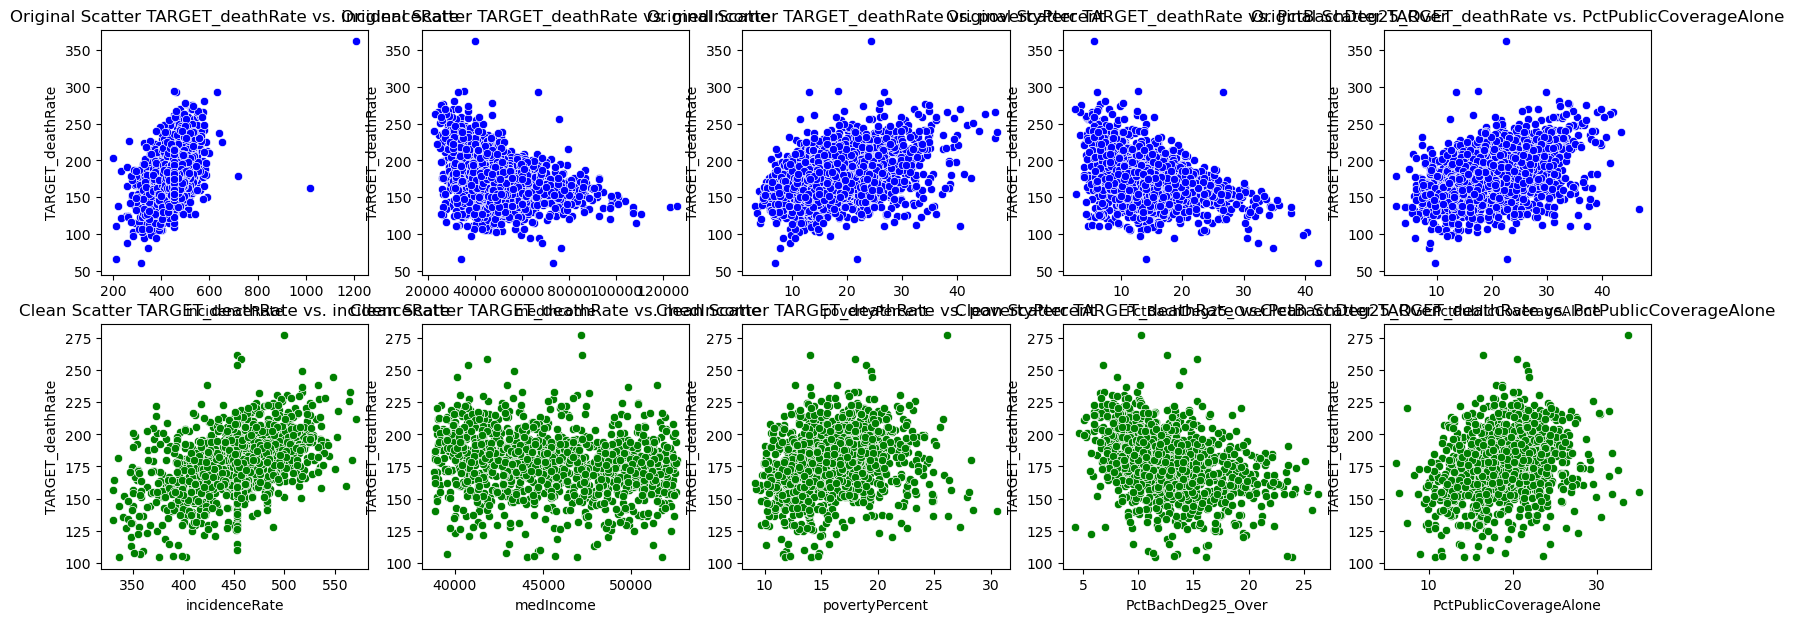

In [34]:
# setup figure
fig, ax = plt.subplots(2,5, figsize=(20,7))

for i, var in enumerate(['incidenceRate', 'medIncome', 'povertyPercent', 'PctBachDeg25_Over', 'PctPublicCoverageAlone']):
  # Original data plots
  g= sns.scatterplot(data= df, x=var, y='TARGET_deathRate', color='blue', ax=ax[0][i])
  g.set_title(f'Original Scatter TARGET_deathRate vs. {var}')


df_clean = pd.concat([x5_train, y5_train], axis=1)

for i, var in enumerate(['incidenceRate', 'medIncome', 'povertyPercent', 'PctBachDeg25_Over', 'PctPublicCoverageAlone']):
  # Cleaned data plots
  g= sns.scatterplot(data= df_clean, x=var, y='TARGET_deathRate', color='green', ax=ax[1][i])
  g.set_title(f'Clean Scatter TARGET_deathRate vs. {var}')


In [35]:
#Now fit a model
model5 = LinearRegression()
model5.fit(x5_train,y5_train)

LinearRegression()

In [36]:
model5.coef_

array([ 0.23834165, -0.00030951,  0.73380114, -1.70676532,  0.31527773])

In [37]:
model5.intercept_

88.44500532161223

In [38]:
y5_predictions=model5.predict(x5_test)
pd.DataFrame({ 'True Value': y5_test,
         'Prediction': y5_predictions})


,True Value,Prediction
2786,151.2,165.776350
1649,177.8,169.743495
723,185.3,194.368986
1555,183.9,166.771282
2935,187.3,172.699721
...,...,...
2675,173.3,167.889939
1206,194.1,199.550562
767,209.6,193.852128
332,160.3,174.005895


In [39]:
#evaluate the results with different metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

r2score_F5 =r2_score(y5_test,y5_predictions)
r2score_F5

0.41661056151201326

In [40]:
mse_F5=mean_squared_error(y5_test, y5_predictions)
mse_F5

462.853084160986

In [41]:
mae_F5=mean_absolute_error(y5_test,y5_predictions)
mae_F5

16.057936502166015

In [42]:
# I further try MinMax scaling instead of 1.5x IQR approach since it did not mean too much
X_F5_2 = df[['incidenceRate', 'medIncome', 'povertyPercent', 'PctBachDeg25_Over', 'PctPublicCoverageAlone']].values
X_F5_2

array([[  489.8      , 61898.       ,    11.2      ,    19.6      ,
           14.       ],
       [  411.6      , 48127.       ,    18.6      ,    22.7      ,
           15.3      ],
       [  349.7      , 49348.       ,    14.6      ,    16.       ,
           21.1      ],
       ...,
       [  453.5494221, 51144.       ,    15.       ,    12.8      ,
           16.8      ],
       [  453.5494221, 50745.       ,    13.3      ,    14.4      ,
           14.       ],
       [  453.5494221, 41193.       ,    13.9      ,    13.7      ,
           12.6      ]])

In [43]:
y_F5_2 =df['TARGET_deathRate'].values

In [44]:
x5_2_train,x5_2_test,y5_2_train,y5_2_test=train_test_split(X_F5_2,y_F5_2,test_size=0.2,random_state=271)

In [45]:
x5_2_train.shape

(2437, 5)

In [46]:
x5_2_test.shape

(610, 5)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x5_2_train_scaled=scaler.fit_transform(x5_2_train)
x5_2_train_scaled

array([[0.2984288 , 0.26464391, 0.30434783, 0.22921914, 0.32727273],
       [0.32408512, 0.307112  , 0.24942792, 0.29219144, 0.40681818],
       [0.23229912, 0.29038303, 0.201373  , 0.27455919, 0.23636364],
       ...,
       [0.125     , 0.15530851, 0.26086957, 0.30478589, 0.16136364],
       [0.20614558, 0.14636633, 0.48741419, 0.19647355, 0.54318182],
       [0.26949085, 0.43813777, 0.15102975, 0.46347607, 0.28409091]])

In [48]:
x5_2_test_scaled=scaler.transform(x5_2_test)

In [49]:
model5_2=LinearRegression()

In [50]:
model5_2.fit(x5_2_train_scaled,y5_2_train)

LinearRegression()

In [51]:
y5_2_predictions=model5_2.predict(x5_2_test_scaled)

In [52]:
for i in range(len(y5_2_predictions)):
    print("Predicted:", y5_2_predictions[i], "  --> Actual values:", y5_2_test[i])

Predicted: 166.65531063690162   --> Actual values: 151.2
Predicted: 172.62987164786423   --> Actual values: 177.8
Predicted: 193.7813228026697   --> Actual values: 185.3
Predicted: 169.1871590050612   --> Actual values: 183.9
Predicted: 173.99140262584365   --> Actual values: 187.3
Predicted: 163.43758769408748   --> Actual values: 187.1
Predicted: 180.1589692272078   --> Actual values: 187.5
Predicted: 185.32863941153425   --> Actual values: 180.5
Predicted: 191.56101931208656   --> Actual values: 189.2
Predicted: 196.5037285071361   --> Actual values: 226.5
Predicted: 192.2616921425078   --> Actual values: 199.1
Predicted: 209.37496329529182   --> Actual values: 214.9
Predicted: 205.43294765090636   --> Actual values: 214.9
Predicted: 185.48011016451292   --> Actual values: 197.3
Predicted: 188.07802946708858   --> Actual values: 200.3
Predicted: 181.38914584757936   --> Actual values: 227.6
Predicted: 205.0664817858736   --> Actual values: 234.4
Predicted: 169.53979774055603   --> A

In [53]:
r2score_F5_2 =r2_score(y5_2_test,y5_2_predictions)
r2score_F5_2

0.43755783907017287

In [54]:
mse_F5_2=mean_squared_error(y5_2_test,y5_2_predictions)
mse_F5_2

446.23380485469795

In [55]:
mae_F5_2=mean_absolute_error(y5_2_test,y5_2_predictions)
mae_F5_2

15.815773162992025

In [56]:
model5_2.coef_

array([217.75720161,   4.9171939 ,  36.08400386, -67.38312699,
        17.99485752])

In [57]:
model5_2.intercept_

124.10575597281269

In [58]:
df_corr[(df_corr["TARGET_deathRate"]<=-0.36)|(df_corr["TARGET_deathRate"]>0.36)]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,-0.141535,0.004375,-0.021929,0.012048,0.011783,-0.036905,-0.266820,0.088463,0.261976,-0.094765,-0.287817,0.404589,-0.485477,-0.397487,0.378412,-0.386066,-0.326067,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.004032,0.018089,-0.014733,-0.009106,0.036172,-0.118400,-0.119524,-0.170762,0.022644,0.038442,0.046835,0.121725,-0.038177,0.004622,0.099979,0.105174,0.098846,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,0.440047,-0.013288,-0.091663,-0.153278,0.022317,0.112065,0.355123,-0.289383,-0.190006,0.101864,0.492810,-0.471348,0.704928,0.676307,-0.453108,0.724175,0.706956,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.202860,-0.029280,-0.214001,-0.148164,-0.005976,0.074308,-0.642857,0.288106,0.094211,-0.079355,-0.387122,0.194361,-0.531600,-0.719972,0.655148,-0.822534,-0.682760,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
PctHS25_Over,-0.311375,-0.295929,0.404589,0.121725,-0.471348,-0.311849,0.194361,-0.085128,-0.256878,0.036587,0.318277,0.344840,-0.010754,-0.138728,0.102434,0.217069,0.438929,-0.184084,-0.384049,1.000000,-0.740611,-0.337687,0.082306,-0.221935,-0.274811,-0.222803,0.427974,0.297143,0.188045,-0.024445,-0.436561,-0.285611,0.062176,0.016600
PctBachDeg25_Over,0.321021,0.293210,-0.485477,-0.038177,0.704928,0.297463,-0.531600,0.108594,0.317186,-0.020352,-0.131599,-0.180845,-0.002876,0.013918,0.103585,-0.396579,-0.404754,0.209262,0.599814,-0.740611,1.000000,0.597301,-0.372980,0.603248,0.580386,0.539084,-0.636095,-0.605760,0.048652,-0.146409,0.437963,0.039075,0.098134,-0.087940
PctEmployed16_Over,0.197981,0.125015,-0.397487,0.004622,0.676307,0.139571,-0.719972,0.087669,0.259799,-0.023598,-0.161204,-0.243469,0.002992,0.011416,0.393808,-0.336778,-0.263649,0.142727,0.457587,-0.337687,0.597301,1.000000,-0.631548,0.681147,0.673914,0.684404,-0.751364,-0.694092,0.262538,-0.328480,0.231351,0.048235,0.304634,0.080795
PctUnemployed16_Over,-0.009016,0.069701,0.378412,0.099979,-0.453108,0.050768,0.655148,-0.031957,-0.087914,0.018590,-0.142737,-0.111161,0.002164,0.131506,-0.551483,0.181193,0.130694,-0.061204,-0.308920,0.082306,-0.372980,-0.631548,1.000000,-0.634317,-0.522160,-0.474745,0.529821,0.655366,-0.501755,0.469273,-0.022020,0.028463,-0.469609,-0.067906
PctPrivateCoverage,0.132244,0.056183,-0.386066,0.105174,0.724175,0.052677,-0.822534,0.092545,0.242736,0.004665,0.082232,0.046909,-0.001530,-0.144391,0.449452,-0.454751,-0.253851,0.191902,0.487742,-0.221935,0.603248,0.681147,-0.634317,1.000000,0.834903,0.827459,-0.720012,-0.886234,0.429031,-0.345172,0.189332,-0.176300,0.434640,-0.040437
PctPublicCoverage,-0.173548,-0.131687,0.404572,0.046109,-0.754822,-0.160066,0.651162,-0.051497,-0.295526,0.049060,0.398967,0.455496,-0.007308,-0.134812,-0.246972,0.318540,0.278220,-0.172834,-0.422470,0.427974,-0.636095,-0.751364,0.529821,-0.720012,-0.770221,-0.778315,1.000000,0.865833,-0.133705,0.195597,-0.305625,-0.078708,-0.362171,-0.030531


In [59]:
# Second let F=10 I choose 10 features incidentRate, medIncome, povertyPercent,PctBachDeg25_Over, PctPublicCoverageAlone,
#PctPublicCoverage,PctHS25_Over,PctEmployed16_Over,PctPrivateCoverage,PctUnemployed16_Over since they have the 10 highest corr with deathrate.
X_F10 = df[['incidenceRate', 'medIncome', 'povertyPercent', 'PctBachDeg25_Over', 'PctPublicCoverageAlone','PctPublicCoverage', 'PctHS25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage', 'PctUnemployed16_Over']].values
X_F10

array([[  489.8       , 61898.        ,    11.2       , ...,
           51.9       ,    75.1       ,     8.        ],
       [  411.6       , 48127.        ,    18.6       , ...,
           55.9       ,    70.2       ,     7.8       ],
       [  349.7       , 49348.        ,    14.6       , ...,
           45.9       ,    63.7       ,     7.        ],
       ...,
       [  453.5494221 , 51144.        ,    15.        , ...,
           64.8       ,    62.        ,     6.4       ],
       [  453.5494221 , 50745.        ,    13.3       , ...,
           54.15264249,    75.9       ,     6.9       ],
       [  453.5494221 , 41193.        ,    13.9       , ...,
           48.8       ,    76.1       ,     9.2       ]])

In [60]:
y_F10 =df['TARGET_deathRate'].values

In [61]:
x10_train,x10_test,y10_train,y10_test=train_test_split(X_F10,y_F10,test_size=0.2,random_state=271)

In [62]:
x10_train.shape

(2437, 10)

In [63]:
x10_test.shape

(610, 10)

In [64]:
x10_train_scaled=scaler.fit_transform(x10_train)

In [65]:
x10_test_scaled=scaler.transform(x10_test)

In [66]:
model10=LinearRegression()
model10.fit(x10_train_scaled,y10_train)

LinearRegression()

In [67]:
model10.coef_

array([211.6666912 ,  -1.37521583,  26.75754722, -35.28856317,
        26.61284486, -25.02677824,  33.98228723,  -7.59442199,
       -11.30480887,  17.07636065])

In [68]:
model10.intercept_

116.41693846088421

In [69]:
y10_predictions=model10.predict(x10_test_scaled)
for i in range(len(y10_predictions)):
    print("Predicted:", y10_predictions[i], "  --> Actual values:", y10_test[i])

Predicted: 162.5976039658383   --> Actual values: 151.2
Predicted: 174.3299297567587   --> Actual values: 177.8
Predicted: 194.72937533009386   --> Actual values: 185.3
Predicted: 169.59600799563032   --> Actual values: 183.9
Predicted: 177.5172712799224   --> Actual values: 187.3
Predicted: 166.06333574941982   --> Actual values: 187.1
Predicted: 177.04807960731978   --> Actual values: 187.5
Predicted: 185.7408368448098   --> Actual values: 180.5
Predicted: 194.1070815597405   --> Actual values: 189.2
Predicted: 208.726963770867   --> Actual values: 226.5
Predicted: 198.64404915129967   --> Actual values: 199.1
Predicted: 212.2742145072927   --> Actual values: 214.9
Predicted: 200.5175504126883   --> Actual values: 214.9
Predicted: 193.02568208456154   --> Actual values: 197.3
Predicted: 184.42412170716398   --> Actual values: 200.3
Predicted: 175.5239399432343   --> Actual values: 227.6
Predicted: 207.6249821068005   --> Actual values: 234.4
Predicted: 169.09549715876085   --> Actual

In [70]:
r2score_F10 =r2_score(y10_test,y10_predictions)
r2score_F10

0.45801720891320075

In [71]:
mse_F10=mean_squared_error(y10_test, y10_predictions)
mse_F10

430.00162475836476

In [72]:
mae_F10=mean_absolute_error(y10_test,y10_predictions)
mae_F10

15.363510026451934

In [73]:
#for F=20 will use these features
df_corr[(df_corr["TARGET_deathRate"]<=-0.17)|(df_corr["TARGET_deathRate"]>0.17)]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,-0.141535,0.004375,-0.021929,0.012048,0.011783,-0.036905,-0.266820,0.088463,0.261976,-0.094765,-0.287817,0.404589,-0.485477,-0.397487,0.378412,-0.386066,-0.326067,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.004032,0.018089,-0.014733,-0.009106,0.036172,-0.118400,-0.119524,-0.170762,0.022644,0.038442,0.046835,0.121725,-0.038177,0.004622,0.099979,0.105174,0.098846,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,0.440047,-0.013288,-0.091663,-0.153278,0.022317,0.112065,0.355123,-0.289383,-0.190006,0.101864,0.492810,-0.471348,0.704928,0.676307,-0.453108,0.724175,0.706956,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.202860,-0.029280,-0.214001,-0.148164,-0.005976,0.074308,-0.642857,0.288106,0.094211,-0.079355,-0.387122,0.194361,-0.531600,-0.719972,0.655148,-0.822534,-0.682760,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
PercentMarried,-0.106108,-0.181029,-0.266820,-0.119524,0.355123,-0.160463,-0.642857,-0.038143,0.043521,0.046372,0.449986,0.375208,-0.014789,-0.100512,1.000000,-0.012375,0.132792,-0.060494,0.053037,0.102434,0.103585,0.393808,-0.551483,0.449452,0.300249,0.232899,-0.246972,-0.459990,0.677420,-0.622357,-0.148691,-0.104669,0.870261,0.141404
PctHS18_24,-0.182054,-0.151418,0.261976,0.022644,-0.190006,-0.151821,0.094211,-0.057035,-0.082350,0.050574,0.241310,0.242827,-0.030934,0.027228,0.132792,0.084629,1.000000,-0.387677,-0.389334,0.438929,-0.404754,-0.263649,0.130694,-0.253851,-0.260841,-0.244494,0.278220,0.234124,0.045306,-0.024868,-0.199770,-0.060415,0.120040,0.058227
PctBachDeg18_24,0.284176,0.259761,-0.287817,0.046835,0.492810,0.248375,-0.387122,0.063819,0.205190,-0.016909,-0.034135,-0.070699,-0.012163,-0.060961,0.053037,-0.381422,-0.389334,0.119734,1.000000,-0.384049,0.599814,0.457587,-0.308920,0.487742,0.449912,0.450996,-0.422470,-0.421805,0.069133,-0.093614,0.345883,0.006547,-0.000104,-0.125073
PctHS25_Over,-0.311375,-0.295929,0.404589,0.121725,-0.471348,-0.311849,0.194361,-0.085128,-0.256878,0.036587,0.318277,0.344840,-0.010754,-0.138728,0.102434,0.217069,0.438929,-0.184084,-0.384049,1.000000,-0.740611,-0.337687,0.082306,-0.221935,-0.274811,-0.222803,0.427974,0.297143,0.188045,-0.024445,-0.436561,-0.285611,0.062176,0.016600
PctBachDeg25_Over,0.321021,0.293210,-0.485477,-0.038177,0.704928,0.297463,-0.531600,0.108594,0.317186,-0.020352,-0.131599,-0.180845,-0.002876,0.013918,0.103585,-0.396579,-0.404754,0.209262,0.599814,-0.740611,1.000000,0.597301,-0.372980,0.603248,0.580386,0.539084,-0.636095,-0.605760,0.048652,-0.146409,0.437963,0.039075,0.098134,-0.087940
PctEmployed16_Over,0.197981,0.125015,-0.397487,0.004622,0.676307,0.139571,-0.719972,0.087669,0.259799,-0.023598,-0.161204,-0.243469,0.002992,0.011416,0.393808,-0.336778,-0.263649,0.142727,0.457587,-0.337687,0.597301,1.000000,-0.631548,0.681147,0.673914,0.684404,-0.751364,-0.694092,0.262538,-0.328480,0.231351,0.048235,0.304634,0.080795


In [74]:
X_F20 = df[['incidenceRate','medIncome','povertyPercent','PercentMarried','PctHS18_24','PctBachDeg18_24','PctHS25_Over','PctBachDeg25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctEmpPrivCoverage','PctPublicCoverage','PctPublicCoverageAlone','PctWhite','PctBlack','PctAsian','PctOtherRace','PctMarriedHouseholds']].values
X_F20

array([[  489.8       , 61898.        ,    11.2       , ...,
            4.8218571 ,     1.84347853,    52.85607588],
       [  411.6       , 48127.        ,    18.6       , ...,
            2.24623259,     3.74135153,    45.37250044],
       [  349.7       , 49348.        ,    14.6       , ...,
            0.46589818,     2.74735831,    54.44486837],
       ...,
       [  453.5494221 , 51144.        ,    15.        , ...,
            1.31647174,     5.68070519,    55.15394913],
       [  453.5494221 , 50745.        ,    13.3       , ...,
            0.24463169,     2.13179047,    58.48423194],
       [  453.5494221 , 41193.        ,    13.9       , ...,
            3.17775301,     1.35645744,    56.04024208]])

In [75]:
y_F20 =df['TARGET_deathRate'].values

In [76]:
x20_train,x20_test,y20_train,y20_test=train_test_split(X_F20,y_F20,test_size=0.2,random_state=271)

In [77]:
x20_train.shape

(2437, 20)

In [78]:
x20_train_scaled=scaler.fit_transform(x20_train)
x20_test_scaled=scaler.fit_transform(x20_test)

In [79]:
model20=LinearRegression()
model20.fit(x20_train_scaled,y20_train)
model20.coef_

array([195.01899158,  -0.7590551 ,  17.44832693,  44.95172032,
        18.33360731,  -0.67907104,  15.11981639, -50.34429707,
       -30.75308711,   7.80170585, -26.83552469,   1.86681136,
        21.78238342, -43.87307425,  37.03679442,  -7.32506653,
        -4.09576493,   5.12365166, -38.29952002, -62.6990625 ])

In [80]:
model20.intercept_

162.90456073287478

In [81]:
y20_predictions=model20.predict(x20_test_scaled)
for i in range(len(y20_predictions)):
    print("Predicted:", y20_predictions[i], "  --> Actual values:", y20_test[i])

Predicted: 204.78405480592969   --> Actual values: 151.2
Predicted: 216.00393510084356   --> Actual values: 177.8
Predicted: 234.3687282671608   --> Actual values: 185.3
Predicted: 211.7879795457264   --> Actual values: 183.9
Predicted: 204.72697336648247   --> Actual values: 187.3
Predicted: 201.73816596714892   --> Actual values: 187.1
Predicted: 214.4080842687161   --> Actual values: 187.5
Predicted: 222.83262728648864   --> Actual values: 180.5
Predicted: 229.56863011692613   --> Actual values: 189.2
Predicted: 245.73822011110488   --> Actual values: 226.5
Predicted: 240.96785198741821   --> Actual values: 199.1
Predicted: 252.05382458755432   --> Actual values: 214.9
Predicted: 239.62157747300813   --> Actual values: 214.9
Predicted: 224.5352372923188   --> Actual values: 197.3
Predicted: 222.75884951773196   --> Actual values: 200.3
Predicted: 236.38610799939414   --> Actual values: 227.6
Predicted: 275.5932434862222   --> Actual values: 234.4
Predicted: 204.95618852581293   --> 

In [253]:
r2score_F20 =r2_score(y20_test,y20_predictions)
r2score_F20

-1.1847501716426465

In [254]:
mse_F20=mean_squared_error(y20_test, y20_predictions)
mse_F20

1733.3504660058493

In [255]:
mae_F20=mean_absolute_error(y20_test,y20_predictions)
mae_F20

36.69347729134002

In [85]:
# F=10 gave best output

In [246]:
#F=5 with IQR + MinMax
x5_train_scaled=scaler.fit_transform(x5_train)
x5_test_scaled=scaler.fit_transform(x5_test)

In [247]:
x5_train_scaled.shape

(1191, 5)

In [248]:
model_deneme=LinearRegression()
model_deneme.fit(x5_train_scaled,y5_train)
model_deneme.coef_

array([ 57.22583109,  -4.26374584,  15.77672448, -37.54883698,
         9.11152641])

In [249]:
ydeneme_predictions=model_deneme.predict(x5_test_scaled)
pd.DataFrame({ 'True Value': y5_test,
         'Prediction': ydeneme_predictions})

,True Value,Prediction
2786,151.2,169.336965
1649,177.8,174.446429
723,185.3,187.169966
1555,183.9,170.291638
2935,187.3,176.816511
...,...,...
2675,173.3,173.332801
1206,194.1,190.147193
767,209.6,187.747239
332,160.3,176.253793


In [250]:
r2score_F5_3 =r2_score(y5_test,ydeneme_predictions)
r2score_deneme

0.35511755166637404

In [251]:
mse_F5_3=mean_squared_error(y5_test, ydeneme_predictions)
mse_F5_3

511.64078476654316

In [252]:
mae_F5_3=mean_absolute_error(y5_test,ydeneme_predictions)
mae_F5_3

17.128602871214454

In [162]:
# Task 3: Gradient Descent Implementation

In [163]:
# Function to compute the cost function
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))

In [164]:
#Function to perform gradient descent
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
   
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term  = np.multiply(error, X[:, j])
            temp[0,j] = theta[0,j] -((alpha / len(X)) * np.sum(term))
          
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [165]:
#Use F=10 scaled data for gradient descent algorithm
X = np.matrix(x10_train_scaled)
y = np.matrix(y10_train).reshape(-1,1)

In [173]:
# Add a column of ones to X matrix
X = np.concatenate([np.ones((len(X), 1)) ,X], axis=1)
theta1 = np.matrix(np.zeros((1, X.shape[1])))

In [167]:
X.shape, y.shape,theta1.shape

((2437, 11), (2437, 1), (1, 11))

In [168]:
# For a = 0.1

alpha1 = 0.1
iters = 1000
# perform gradient descent to fit the model parameters and compute the cost
g1, cost1 = gradientDescent(X,y, theta1, alpha1, iters)
print(g1)
print(cost1)

[[ 65.82443998  61.50155633   5.72289988  42.35922225 -12.23199478
   31.88374935  20.02465628  51.22399911  20.47116801  22.99981316
   34.61290178]]
[8715.01671567 4734.57706705 2645.70734818 1549.09736293  973.00543014
  669.97478025  510.19931666  425.58766877  380.42148878  355.9639978
  342.38626032  334.53203888  329.69621037  326.45941415  324.07675606
  322.15714752  320.49509966  318.98248936  317.5622751   316.20421803
  314.89214609  313.61727311  312.37469412  311.16154681  309.97604692
  308.81698208  307.68344623  306.57470009  305.49009786  304.42904861
  303.39099596  302.37540721  301.38176753  300.40957687  299.45834807
  298.52760589  297.61688632  296.72573608  295.85371232  295.00038229
  294.16532309  293.34812144  292.54837344  291.76568435  290.99966841
  290.2499486   289.51615645  288.79793185  288.09492288  287.40678557
  286.73318378  286.073789    285.42828014  284.79634342  284.17767219
  283.57196671  282.97893409  282.39828806  281.82974885  281.2730430

In [169]:
# For a = 0.5
theta2 = np.matrix(np.zeros((1, X.shape[1])))
alpha2 = 0.5

g2, cost2 = gradientDescent(X,y, theta2, alpha2, iters)
print(g2)
print(cost2)

[[ 78.07162348 156.04584953   9.58315608  46.97452918 -30.95687004
   30.14848418  -8.38202861  43.04587828  10.08516586  12.08844141
   28.88379072]]
[2626.7400817   658.44850586  369.613748    322.31456748  310.27933274
  303.85980394  298.74269346  294.25451965  290.24983068  286.66430988
  283.45009191  280.56595322  277.9754306   275.64612921  273.54924798
  271.65917783  269.95314729  268.41090785  267.01445425  265.74777578
  264.59663522  263.54837214  262.5917282   261.71669166  260.91435922
  260.17681315  259.49701204  258.86869365  258.28628857  257.74484342
  257.23995258  256.76769746  256.32459255  255.90753742  255.51377403
  255.14084883  254.78657897  254.44902237  254.12645099  253.81732714
  253.52028241  253.2340989   252.95769258  252.69009843  252.43045728
  252.1780041   251.93205759  251.69201087  251.4573233   251.22751312
  251.00215093  250.78085395  250.5632808   250.34912698  250.13812078
  249.93001963  249.72460693  249.52168916  249.32109333  249.122664

In [170]:
# For a = 0.70
theta3 = np.matrix(np.zeros((1, X.shape[1])))
alpha3 = 0.70

g3, cost3 = gradientDescent(X,y, theta3, alpha3, iters)
print(g3)
print(cost3)

[[ 84.19806337 176.73890247   9.37118988  44.4886914  -33.44955008
   30.01842633 -12.39797391  40.29517875   6.44674294   7.15123546
   24.84727214]]
[14137.04546236 12264.66238394 10644.88130553  9243.61409734
  8031.37339537  6982.65155939  6075.38347729  5290.48189344
  4611.43546838  4023.96109938  3515.7031755   3075.97343026
  2695.52591068  2366.36232168  2081.56364497  1835.14448547
  1621.92707696  1437.43229322  1277.78536894  1139.634345
  1020.07952031   916.61242474   827.06302789   749.55407217
   682.46156857   624.38062343   574.09587663   530.5559289
   492.85121989   460.19489128   431.90623208   407.39635774
   386.15582149   367.7438973    351.77930878   337.93220902
   325.91724244   315.4875428    306.4295409    298.55847283
   291.71449423   285.75931872   280.57330989   276.05296555
   272.10874142   268.66316834   265.64922354   263.00892156
   260.69209531   258.65534152   256.86110844   255.27690663
   253.87462621   252.62994613   251.52182323   250.5320501

In [171]:
print(computeCost(X,y,g1))
print(computeCost(X,y,g2))
print(computeCost(X,y,g3))

229.63741120087647
199.7391209881505
196.91169001982738


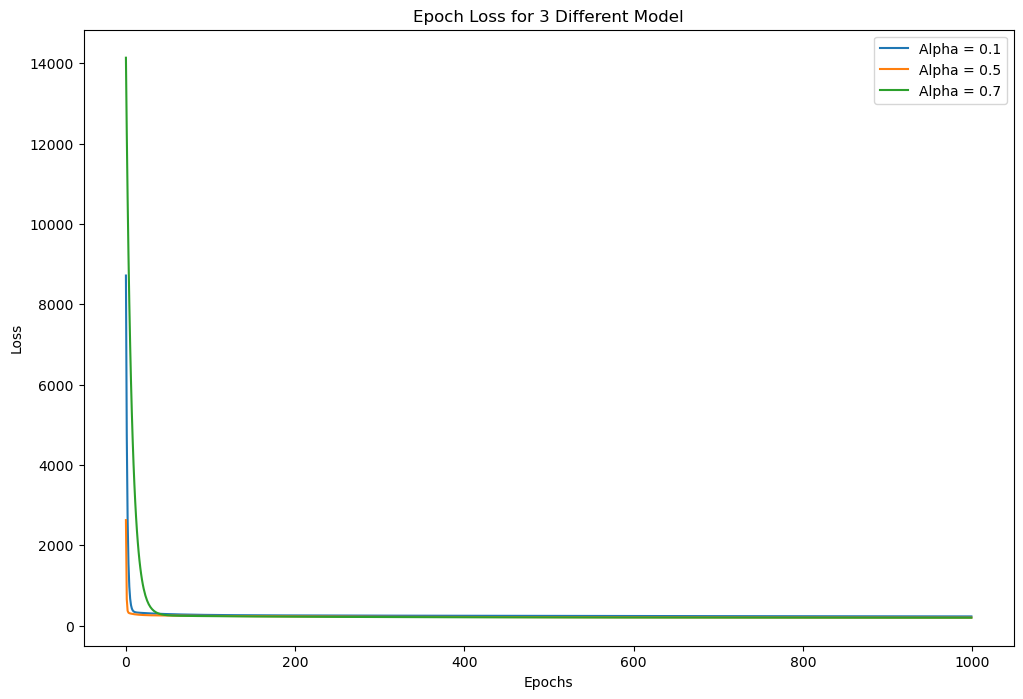

In [172]:
#plot a single epochloss diagram for 3 models
iters =1000
fig, ax = plt.subplots(figsize =(12,8))
ax.plot(np.arange(iters), cost1 , label='Alpha = 0.1')
ax.plot(np.arange(iters), cost2 , label='Alpha = 0.5')
ax.plot(np.arange(iters), cost3 , label='Alpha = 0.7')

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Epoch Loss for 3 Different Model')
plt.legend()

In [174]:
# Task 4 : KNN-Regression  (no feature selection)
df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,8,39.3,36.9,41.7,1458,2.54,52.5,11.5,39.5,42.100000,6.9,23.2,19.6,51.900000,8.0,75.1,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,5,33.0,32.2,33.7,1459,2.34,44.5,6.1,22.4,64.000000,7.5,26.0,22.7,55.900000,7.8,70.2,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,5,45.0,44.0,45.8,1463,2.62,54.2,24.0,36.6,40.977034,9.5,29.0,16.0,45.900000,7.0,63.7,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,3,42.8,42.2,43.4,1587,2.52,52.7,20.2,41.2,36.100000,2.5,31.6,9.3,48.300000,12.1,58.4,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,5,48.3,47.8,48.9,1617,2.34,57.8,14.9,43.0,40.000000,2.0,33.4,15.0,48.200000,4.8,61.6,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,4,44.2,41.1,48.8,838,2.08,51.0,20.9,27.9,40.977034,8.4,32.2,15.2,51.700000,4.3,78.3,54.900000,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,5,30.4,29.3,31.4,892,2.90,52.6,26.7,33.9,35.600000,3.8,23.1,12.4,70.100000,4.6,64.5,53.300000,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,6,30.9,30.5,31.2,907,3.04,54.8,19.7,44.5,33.300000,2.5,23.0,12.8,64.800000,6.4,62.0,52.600000,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,5,39.0,36.9,40.5,924,2.56,58.8,10.9,37.2,40.977034,4.1,36.1,14.4,54.152642,6.9,75.9,56.300000,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [181]:
#use full dataset
X_knn = df.drop(columns=['TARGET_deathRate'])
y_knn = df['TARGET_deathRate']

In [182]:
Xknn_train, Xknn_test, yknn_train, yknn_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=271)

In [184]:
Xknn_train.shape , Xknn_test.shape

((2437, 33), (610, 33))

In [185]:
knn_model1 = KNeighborsRegressor(n_neighbors=5).fit(Xknn_train, yknn_train)

In [189]:
score_knn1 = knn_model1.score(Xknn_test, yknn_test)
score_knn1

0.07206070160910805

In [205]:
preds1 = knn_model1.predict(Xknn_test)
pd.DataFrame({ 'True Value': yknn_test,
                            'Prediction': preds1,
                            'Error': yknn_test - preds1}).head(10)

,True Value,Prediction,Error
2786,151.2,164.02,-12.82
1649,177.8,170.62,7.18
723,185.3,174.72,10.58
1555,183.9,182.92,0.98
2935,187.3,184.06,3.24
976,187.1,171.84,15.26
574,187.5,185.08,2.42
704,180.5,161.04,19.46
2629,189.2,214.18,-24.98
28,226.5,212.88,13.62


In [193]:
mse_knn1=mean_squared_error(yknn_test, preds1)
mse_knn1

736.2141613114756

In [199]:
#I will try the scale the values
Xtrain_scaled = scaler.fit_transform(Xknn_train)
Xtest_scaled = scaler.fit_transform(Xknn_test)

In [200]:
knn_model1_scaled =KNeighborsRegressor(n_neighbors=5).fit(Xtrain_scaled, yknn_train)

In [201]:
scaled_score_knn1 = knn_model1_scaled.score(Xtest_scaled, yknn_test)
scaled_score_knn1

0.3596710162235197

In [204]:
preds1_scaled = knn_model1_scaled.predict(Xtest_scaled)
pd.DataFrame({ 'True Value': yknn_test,
                            'Prediction': preds1_scaled,
                            'Error': yknn_test - preds1_scaled}).head(10)

,True Value,Prediction,Error
2786,151.2,155.42,-4.22
1649,177.8,169.36,8.44
723,185.3,198.22,-12.92
1555,183.9,161.10,22.80
2935,187.3,198.62,-11.32
976,187.1,177.94,9.16
574,187.5,191.74,-4.24
704,180.5,198.58,-18.08
2629,189.2,191.18,-1.98
28,226.5,202.82,23.68


In [203]:
mse_knn1_scaled = mean_squared_error(yknn_test, preds1_scaled)
mse_knn1_scaled

508.0281291803278

In [207]:
# Scaling improved the performaance ı will continue with scaled data for other 2 Knn models
knn_model2_scaled =KNeighborsRegressor(n_neighbors=7).fit(Xtrain_scaled, yknn_train)
scaled_score_knn2 = knn_model2_scaled.score(Xtest_scaled, yknn_test)
scaled_score_knn2

0.3626506790377889

In [208]:
preds2_scaled = knn_model2_scaled.predict(Xtest_scaled)
mse_knn2_scaled = mean_squared_error(yknn_test, preds2_scaled)
mse_knn2_scaled

505.6641060555371

In [221]:
# Model 3 k=12
knn_model3_scaled =KNeighborsRegressor(n_neighbors=15).fit(Xtrain_scaled, yknn_train)
scaled_score_knn3 = knn_model3_scaled.score(Xtest_scaled, yknn_test)
scaled_score_knn3

0.40084548471282877

In [222]:
preds3_scaled = knn_model3_scaled.predict(Xtest_scaled)
mse_knn3_scaled = mean_squared_error(yknn_test, preds3_scaled)
mse_knn3_scaled

475.36087730418944

Text(0, 0.5, 'Mean Squared Error')

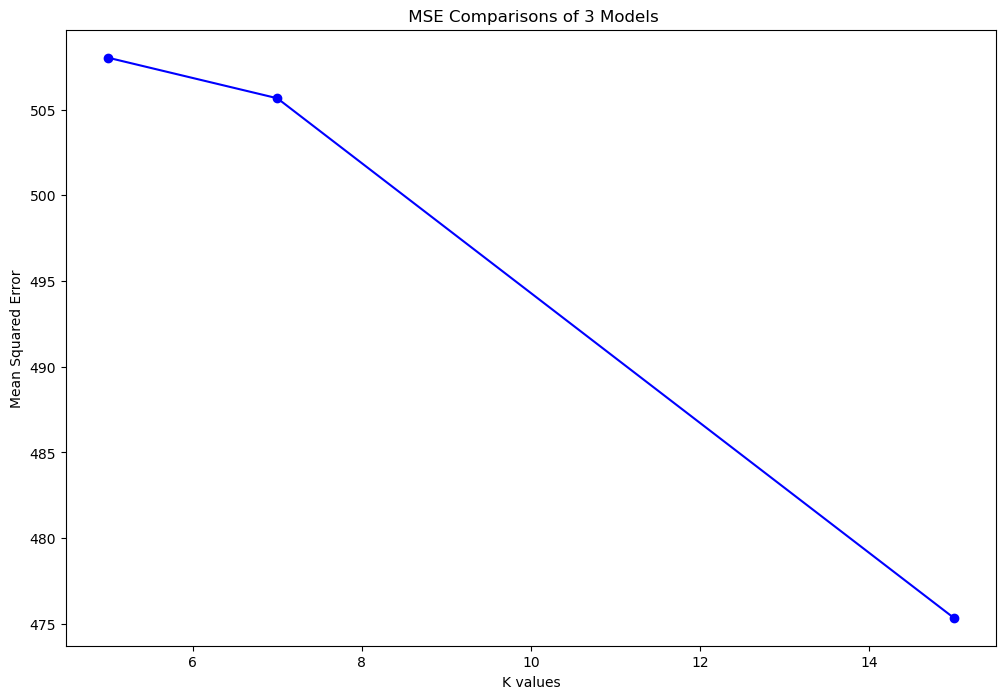

In [229]:
# Model error comparison on diagram
plt.figure(figsize = (12,8))
plt.plot([5,7,15], [mse_knn1_scaled, mse_knn2_scaled, mse_knn3_scaled], marker ='o', color= 'b')
plt.title(' MSE Comparisons of 3 Models')
plt.xlabel('K values')
plt.ylabel('Mean Squared Error')

In [259]:
#linear equation of f=10 model
mystr="y= "
for i, m in enumerate(model10.coef_):
    mystr+="x_{}*{} + ".format(i+1,m)
mystr+= " +"+ str(model10.intercept_)

mystr

'y= x_1*211.66669120480898 + x_2*-1.375215827105872 + x_3*26.75754722107695 + x_4*-35.2885631665402 + x_5*26.61284486146165 + x_6*-25.026778241415535 + x_7*33.98228723401737 + x_8*-7.594421988569005 + x_9*-11.304808872447566 + x_10*17.076360651376685 +  +116.41693846088421'